# Linear Regression

In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from math import sqrt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("Dummy Data HSS.csv")
df.head()

NameError: name 'pd' is not defined

In [3]:
df.shape

(4572, 5)

In [4]:
df = df.iloc[:401]
df.shape

(401, 5)

In [5]:
df.rename(columns = {'Social Media':'Social_Media'}, inplace = True)

In [6]:
df['Radio'] = np.round(df['Radio'], decimals = 2)
df['Social_Media'] = np.round(df['Social_Media'], decimals = 2)
df['Sales'] = np.round(df['Sales'], decimals = 2)
df[['Radio', 'Social_Media', 'Sales']]

,Radio,Social_Media,Sales
0,6.57,2.91,54.73
1,9.24,2.41,46.68
2,15.89,2.91,150.18
3,30.02,6.92,298.25
4,8.44,1.41,56.59
...,...,...,...
396,14.77,4.97,159.81
397,29.28,4.18,300.75
398,8.47,4.08,41.87
399,23.16,2.05,238.37


In [7]:
import math
df.drop(df[df['TV'] >= math.nan].index, inplace = True)
df.drop(df[df['Radio'] >= math.nan].index, inplace = True)
df.drop(df[df['Social_Media'] >= math.nan].index, inplace = True)
df.drop(df[df['Sales'] >= math.nan].index, inplace = True)
df.shape

(401, 5)

In [8]:
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16,6.57,2.91,Mega,54.73
1,13,9.24,2.41,Mega,46.68
2,41,15.89,2.91,Mega,150.18
3,83,30.02,6.92,Mega,298.25
4,15,8.44,1.41,Micro,56.59


<AxesSubplot:xlabel='Social_Media', ylabel='Sales'>

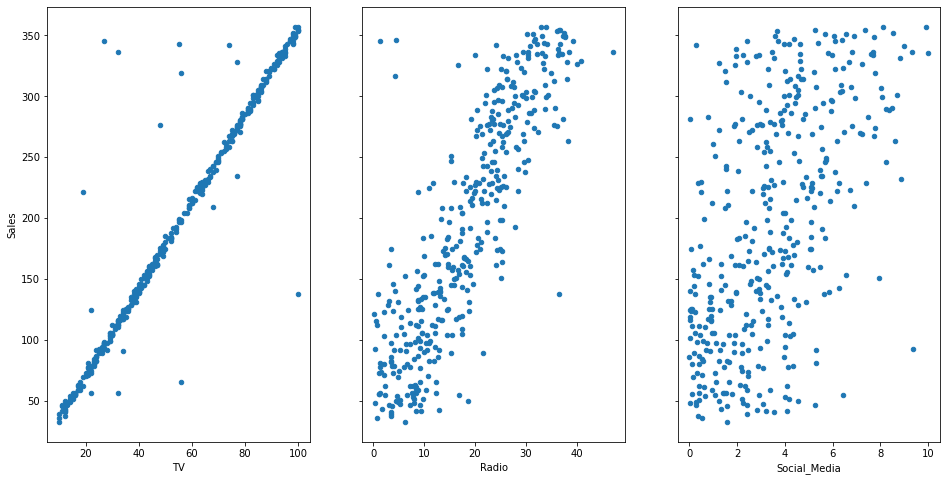

In [9]:
fig,axs = plt.subplots(1,3,sharey=True)
df.plot(kind = 'scatter', x = 'TV', y = 'Sales', ax = axs[0], figsize = (16,8))
df.plot(kind = 'scatter', x = 'Radio', y = 'Sales', ax = axs[1])
df.plot(kind = 'scatter', x = 'Social_Media', y = 'Sales', ax = axs[2])

In [10]:
# For a single Linear Regression Model y = b0 + b1*x
feature_cols = ['Radio']
x = df[feature_cols]
y = df.Sales

In [11]:
LM = LinearRegression()
LM.fit(x, y)
print(LM.intercept_) # -> Gives tbe intercept value b0
print(LM.coef_) # -> Gives the coefficient value b1

51.39594387813656
[7.7981333]


In [12]:
51.39594387813656+7.7981333*50

441.30260887813654

In [13]:
# Predicting for a new value in TV
X_new = pd.DataFrame({'Radio':[50]})
X_new.head()

,Radio
0,50


In [14]:
LM.predict(X_new)

array([441.30260864])

In [17]:
X_new = pd.DataFrame({'Radio':[df.Radio.min(), df.Radio.max()]})
X_new.head()

,Radio
0,0.23
1,47.12


In [18]:
prediction = LM.predict(X_new)
prediction

array([ 53.18951454, 418.84398475])

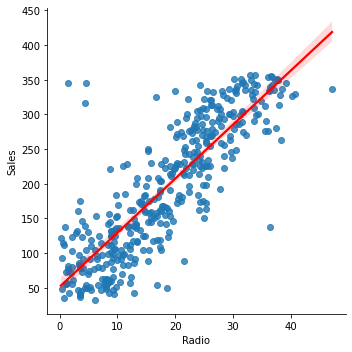

In [19]:
import seaborn as sns
sns.lmplot(x='Radio', y='Sales', data=df, line_kws={'color' : 'red'}, fit_reg=True) 

# HYPOTHESIS TESTING

In [20]:
# Hypothesis Testing
# Null Hypothesis
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ Radio', data=df).fit()

In [21]:
lm.conf_int() # gives the possibility of values for coefficient b1

,0,1
Intercept,41.324002,61.467885
Radio,7.318835,8.277432


* There is no significant relationship between y and x {Failed to reject null hypothesis} (There is difference between y and x)
* There is a relationship between y and x {Accepted the null hypothesis} (there is no difference between y and x)

In [22]:
lm.pvalues

Intercept     2.864786e-21
Radio        3.621465e-112
dtype: float64

* Alpha / significance is the value set for conducting hypothesis. It is known as the probablity of rejecting the null hypothesis when it is in fact true (or) the probablity of making a wrong decision. Normally this value is set to 0.05 meaning that we reject the null hypothesis 5% of the time we repeat the same experimnet but depending on the risk it can be decreased or increased.
* P value is the probablity of getting result from a sample data when the null hypothesis is true. This is a calculated value. If this value is greater than the fixed alpha value then it means that we've rejected the null hypothesis in favour of alternate hypothesis. If it is lesser than the alpha value then, it means that we've accepted the null hypothesis.
* Confidence Interval is the range within which the result value is available. When the null hypothesis is true then it means that the hypothesized mean / average value is available in the confidence interval. "95% Confidence Interval" means that we are 95% confindent that the value is in the interval range.

In [23]:
lm.rsquared # rsquared is used to evaluate the fit of the linear model
# The threshold of a good rsquared value widely depends on the domain

0.7194222596470359

In [24]:
# Muttiple Linear Regression Model y = b0 + b1x1 + b2x2 + ... + e {e -> model error(variation in our model))}
feature_cols = ['TV', 'Radio', 'Social_Media']
X = df[feature_cols]
Y = df.Sales
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [25]:
LM = LinearRegression()
LM.fit(xtrain, ytrain)
print(LM.intercept_) # -> Gives the intercept value b0
print(LM.coef_) # -> gives the coeffecient value b1

8.510432479467141
[3.18590949 0.72820556 0.27711869]


In [26]:
prediction = LM.predict(xtest)
print(sqrt(mean_squared_error(ytest, prediction)))

17.07427998451938


In [27]:
LM = smf.ols(formula = 'Sales ~ TV + Radio + Social_Media', data = df).fit()
LM.conf_int()
LM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1741.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          5.02e-228
Time:                        14:23:45   Log-Likelihood:                -1865.5
No. Observations:                 401   AIC:                             3739.
Df Residuals:                     397   BIC:                             3755.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6577      2.962      1.910      0.057      -0.166      11.481
TV               3.1789      0.093     34.262      0.000       2.997       3.361
Radio            0.8237      0.251      3.286      0.001       0.331       1.317
Social_Media     0.3985      0.713      0.559      0.577      -1.004       1.801
==============================================================================
Omnibus:                      354.194   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46984.841
Skew:                           3.028   Prob(JB):                         0.00
Kurtosis:                      55.682   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
LM = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()
LM.rsquared # rsquared value always increases as the no. of predictors (or) features increase
# selecting the model with higher rsquared value is not the reliable approach for choosing the best linear model

0.9293227640637302

# CATEGORICAL PREDICTORS

In [29]:
df.rename(columns = {'Social Media':'Social_Media'}, inplace = True)

In [30]:
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16,6.57,2.91,Mega,54.73
1,13,9.24,2.41,Mega,46.68
2,41,15.89,2.91,Mega,150.18
3,83,30.02,6.92,Mega,298.25
4,15,8.44,1.41,Micro,56.59


In [31]:
# Adding columns with categorical value
np.random.seed(11112)
nums = np.random.rand(len(df))
mask_large = nums > 0.5
df['Size'] = 'Small'
df.loc[mask_large, 'Size'] = 'Large'
df.head()

,TV,Radio,Social_Media,Influencer,Sales,Size
0,16,6.57,2.91,Mega,54.73,Small
1,13,9.24,2.41,Mega,46.68,Small
2,41,15.89,2.91,Mega,150.18,Large
3,83,30.02,6.92,Mega,298.25,Small
4,15,8.44,1.41,Micro,56.59,Large


In [32]:
# Dummy Variable
df['isLarge'] = df.Size.map({'Small':0, 'Large':1})
df.head()

,TV,Radio,Social_Media,Influencer,Sales,Size,isLarge
0,16,6.57,2.91,Mega,54.73,Small,0
1,13,9.24,2.41,Mega,46.68,Small,0
2,41,15.89,2.91,Mega,150.18,Large,1
3,83,30.02,6.92,Mega,298.25,Small,0
4,15,8.44,1.41,Micro,56.59,Large,1


In [33]:
# Multiple Linear Regression
feature_cols = ['TV', 'Radio', 'Social_Media', 'isLarge']
X = df[feature_cols]
Y = df.Sales
LM = LinearRegression()
LM.fit(X, Y)
zip(feature_cols, LM.coef_)

In [36]:
np.random.seed(11111)
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.03) & (nums < 0.06)
mask_urban = nums > 0.66
df['Area'] = 'Rural'
df.loc[mask_suburban, 'Area'] = 'Suburban'
df.loc[mask_urban, 'Area'] = 'Urban'
df.head()

,TV,Radio,Social_Media,Influencer,Sales,Size,isLarge,Area
0,16,6.57,2.91,Mega,54.73,Small,0,Urban
1,13,9.24,2.41,Mega,46.68,Small,0,Rural
2,41,15.89,2.91,Mega,150.18,Large,1,Rural
3,83,30.02,6.92,Mega,298.25,Small,0,Rural
4,15,8.44,1.41,Micro,56.59,Large,1,Rural


In [38]:
# Dummy Variable
area_dummies = pd.get_dummies(df.Area, prefix = 'Area').iloc[:, 1:]
df = pd.concat([df, area_dummies], axis = 1)
df.head()
# The above code is written to create Area_Suburban and Area_Urban from Area

,TV,Radio,Social_Media,Influencer,Sales,Size,isLarge,Area,Area_Suburban,Area_Urban
0,16,6.57,2.91,Mega,54.73,Small,0,Urban,0,1
1,13,9.24,2.41,Mega,46.68,Small,0,Rural,0,0
2,41,15.89,2.91,Mega,150.18,Large,1,Rural,0,0
3,83,30.02,6.92,Mega,298.25,Small,0,Rural,0,0
4,15,8.44,1.41,Micro,56.59,Large,1,Rural,0,0


In [40]:
# Multiple Linear Regression
feature_cols = ['TV', 'Radio', 'Social_Media', 'isLarge', 'Area_Suburban', 'Area_Urban']
X = df[feature_cols]
Y = df.Sales
LM = LinearRegression()
LM.fit(X, Y)
print(feature_cols, LM.coef_)

['TV', 'Radio', 'Social_Media', 'isLarge', 'Area_Suburban', 'Area_Urban'] [ 3.16884264  0.85173488  0.43034923  5.02605592 -4.55973879 -0.31534877]


Coefficents is Interpreted as 'Considering all the other variables as fixed being a Suburban area is associated with an average increase in Sales of "455.97 widgets" as compared to the baseline level {rural}, being an Urban area is associated with an average decrease in "315.34 widgets" as compared to the baseline level {rural}'